In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import scipy.optimize as sco
import pandas as pd
import glob
import seaborn as sns
import random as rd

plt.rc("axes", labelsize=18)
plt.rc("xtick", labelsize=16, top=True, direction="in")
plt.rc("ytick", labelsize=16, right=True, direction="in")
plt.rc("axes", titlesize=18)
plt.rc("legend", fontsize=16)
plt.rc("figure", figsize=(7, 5), titlesize=18)

df_in = pd.read_csv('Samlet_glas_til_luft_df_alle_punkter.csv')
df = df_in[['Angle_small','Angle_alpha','Angle_big_t','Angle_big_r','Coff_Rp','Coff_Rp_err','Coff_Rs','Coff_Rs_err']].copy()
df

,Angle_small,Angle_alpha,Angle_big_t,Angle_big_r,Coff_Rp,Coff_Rp_err,Coff_Rs,Coff_Rs_err
0,15,0.5,6,152,0.011524,0.009936,0.009250,0.005992
1,20,0.5,9,142,0.005317,0.005397,0.010748,0.004218
2,25,0.5,12,133,0.005818,0.006262,0.012715,0.003757
3,30,0.5,15,122,-0.000141,0.007245,0.021360,0.003588
4,32,0.5,17,119,0.002838,0.010906,0.027885,0.006180
5,34,0.5,19,115,0.001712,0.009410,0.033543,0.004176
6,36,0.5,21,110,-0.000987,0.005333,0.032368,0.004011
7,38,0.5,24,106,0.003499,0.007981,0.044843,0.004193
8,40,0.5,28,102,0.009293,0.004731,0.048047,0.001890
9,42,0.5,33,98,0.474621,0.006778,0.099825,0.003755


In [2]:
def theta_2(x):
    return x[0] + x[2]

def err_tht2(x):
    return np.sqrt(2)*x[1]

df['Theta_2'] = df.apply(theta_2, axis=1)
df['Err_tht2'] = df.apply(err_tht2, axis=1)

def R_p(x):
    return (np.tan(x[0]-x[8]))**2/(np.tan(x[0]+x[8]))**2

df['R_p'] = df.apply(R_p, axis=1)
df

,Angle_small,Angle_alpha,Angle_big_t,Angle_big_r,Coff_Rp,Coff_Rp_err,Coff_Rs,Coff_Rs_err,Theta_2,Err_tht2,R_p
0,15,0.5,6,152,0.011524,0.009936,0.009250,0.005992,21.0,0.707107,0.001410
1,20,0.5,9,142,0.005317,0.005397,0.010748,0.004218,29.0,0.707107,0.020322
2,25,0.5,12,133,0.005818,0.006262,0.012715,0.003757,37.0,0.707107,0.335665
3,30,0.5,15,122,-0.000141,0.007245,0.021360,0.003588,45.0,0.707107,4.139938
4,32,0.5,17,119,0.002838,0.010906,0.027885,0.006180,49.0,0.707107,18.560476
5,34,0.5,19,115,0.001712,0.009410,0.033543,0.004176,53.0,0.707107,0.011045
6,36,0.5,21,110,-0.000987,0.005333,0.032368,0.004011,57.0,0.707107,0.261444
7,38,0.5,24,106,0.003499,0.007981,0.044843,0.004193,62.0,0.707107,13.217857
8,40,0.5,28,102,0.009293,0.004731,0.048047,0.001890,68.0,0.707107,0.013001
9,42,0.5,33,98,0.474621,0.006778,0.099825,0.003755,75.0,0.707107,6251.956379


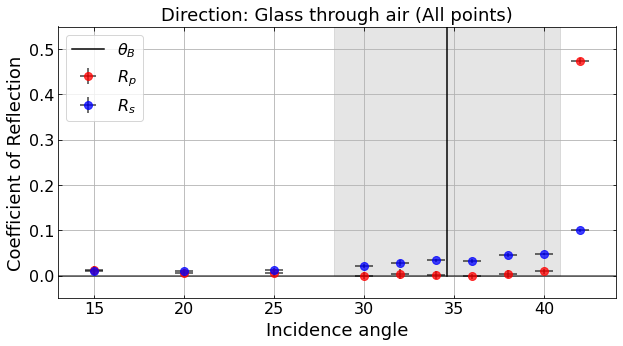

In [10]:
#Sketch
fig, ax = plt.subplots(figsize=(10,5))


# Select angle with ang and error in angle with err_ang
ang_1 = 34.60
err_ang_1 = 6.28

ang_2 = 43.60
err_ang_2 = 12.80
xs_1 = np.linspace(ang_1-err_ang_1, ang_1+err_ang_1, 100)
#xs_4 = np.linspace(ang_2-err_ang_2, ang_2+err_ang_2, 100)

#Arbitrary y limits
y_min = 0
y_max = 1

ys = np.linspace(0,1,3)
xs_2 = [ang_1 for c in ys]
#xs_3 = [ang_2 for c in ys]

ax.errorbar(x=df['Angle_small'],y=df['Coff_Rp'],
             fmt='o',mfc='r',mec='r',ms=8,
             xerr=df['Angle_alpha'],yerr=df['Coff_Rp_err'], 
             ecolor='k',label=r'$R_p$',alpha=0.75)

ax.errorbar(x=df['Angle_small'],y=df['Coff_Rs'],
             fmt='o',mfc='b',mec='b',ms=8,
             xerr=df['Angle_alpha'],yerr=df['Coff_Rs_err'], 
             ecolor='k',label=r'$R_s$',alpha=0.75)

ax.plot(xs_2,ys, color='k', label=r'$\theta_B$')

#ax.plot(xs_3,ys, color='k', label=r'$\theta_C$')

ax.fill_between(x = xs_1, y1=y_max, y2=y_min,color='k',alpha=0.1)
#ax.fill_between(x = xs_4, y1=y_max, y2=y_min,color='k',alpha=0.1)

ax.grid()
ax.legend()
ax.set_xlim([13,44])
ax.set_ylim([-0.05,0.55])
ax.hlines(0,0,45,alpha=0.5,linewidth=2)
ax.set_title('Direction: Glass through air (All points)')
ax.set_ylabel('Coefficient of Reflection')
ax.set_xlabel('Incidence angle')

plt.savefig("glas_til_luft_plot_alle.pdf")

In [ ]:
# Calculate refrative index of glass directly
def n_glas_err(x):
    x0_alpha = x[1]
    x8_alpha = x[9]
    dn_dx0 = np.pi/180 * np.cos(x[8] * np.pi/180)/np.sin(x[0] * np.pi/180)
    dn_dx8 = -np.pi/180 * np.sin(x[8] * np.pi/180)/(np.cos(x[0] * np.pi/180)**2)
    return np.sqrt(dn_dx0**2 * x0_alpha**2 + dn_dx8**2 * x8_alpha**2)

df['n_glas'] = df.apply(lambda x: np.sin(x[8] * np.pi/180)/np.sin(x[0] * np.pi/180), axis = 1)
df['n_glas_err'] = df.apply(lambda x: np.sin(x[8] * np.pi/180)/np.sin(x[0] * np.pi/180), axis = 1)

n_glas_mean = np.mean(df['n_glas'])
n_err = np.sqrt(np.sum(df['n_glas_err'].apply(lambda x: x**2)))/(len(df['n_glas']))
print(n_glas_mean, n_err)